# Predictive Health Assessment: Leveraging DHS Data for Targeted Interventions in Kenya


**Authors**: [Alpha Guya](mailto:alpha.guya@student.moringaschool.com), [Ben Ochoro](mailto:ben.ochoro@student.moringaschool.com), [Caleb Ochieng](mailto:caleb.ochieng@student.moringaschool.com), [Christine Mukiri](mailto:christine.mukiri@student.moringaschool.com), [Dominic Muli](mailto:dominic.muli@student.moringaschool.com), [Frank Mandele](mailto:frank.mandele@student.moringaschool.com), [Jacquiline Tulinye](mailto:jacquiline.tulinye@student.moringaschool.com) and [Lesley Wanjiku](mailto:lesley.wanjiku@student.moringaschool.com)

## 1.0) Project Overview

Our project focuses on using machine learning techniques and data sourced from the Demographic and Health Surveys (DHS) program to generate predictive models aimed at evaluating individual and household health risks in Kenya. By analyzing various set of demographic, socio-economic, and health-related indicators, we target to develop reliable predictive models capable of estimating the likelihood of malnutrition, disease prevalence, and various health risks within certain communities. The goal is to provide users such as public health officials with targeted insights. This will enable more effective allotment of resources and interventions. This proactive approach is geared to optimize the impact of health initiatives, allowing for the prioritization and customization of interventions to at risk populations, ultimately contributing to the improvement of health outcomes in Kenya.

## 1.1) Business Problem

Despite existing health interventions, Kenya encounters difficulties in effectively targeting resources and interventions. This will help to address individual and household health risks, including malnutrition, diseases, and other health concerns. This fault highlights the need for a predictive and targeted approach to allocate resources and interventions more effectively. Leveraging machine learning models built upon Demographic and Health Surveys (DHS) data, the project aims to develop predictive models capable of assessing the likelihood of malnutrition, disease prevalence, and health risks based on individual and household characteristics. By accurately identifying at-risk populations, this solution seeks to empower decision-makers and public health officials to allocate resources on need basis, ultimately increasing the impact of health interventions and improving overall health outcomes in Kenya.

## 1.2) Objectives


Based on the data provided by DHS(Demographic and Health Surveys) , some of the objectives include:

* To analyze trends in health indicators over time.

* To predict Health Risks based on individual and household characteristics. 

* To find the relationship between the most common diseases and the demographic.

*  To Build predictive models to estimate health outcomes based on various demographic and socio-economic factors.

*  To identify regional variations in health indicators.

* To Identify factors contributing to changes in health outcomes.

* To Conduct comprehensive feature engineering to extract relevant features from DHS data, considering demographic, socio-economic, and health-related variables.


### API Deployment and Usability

Deploy an accessible API interface for stakeholders to input data and receive health risk predictions based on the developed models.

### Recommendations and Conclusion
* Targeted Intervention Recommendations:

Utilize model predictions to generate targeted recommendations for health interventions and resource allocation in specific Kenyan communities.

* Impact Assessment and Validation:

Assess the real-world impact of model-guided interventions by monitoring and evaluating changes in health outcomes in targeted Kenyan populations.

## 1.3) Metric of Success

* Achieve a predictive accuracy of at least 90% on unseen validation data.
* Identify and utilize the top 10 most influential features contributing to the models' predictive power.
* Generate clear and interpretable explanations for at least 70% of model predictions.
* Create a prioritized list of actionable recommendations based on identified health risks for at least 100 of communities.
* Ensure an API uptime of at least 90% and gather feedback on usability for further improvements.
* Measure the effectiveness of interventions by observing changes in health indicators, aiming for improvements in at least 80% of targeted communities.

## 1.4) Data Relevance and Validation

The data available is relevant for the intended analysis and predictions

## 2.0) Understanding the Data

The data for this project is obtained from the [DHS Program website](https://dhsprogram.com/data/dataset/Kenya_Standard-DHS_2022.cfm?flag=0).
The encoding for this dataset is explained [here](./Recode7_DHS_10Sep2018_DHSG4.pdf).

## 2.1) Reading the Data

### 2.1.1) Installations

In [61]:
# installations
# %pip install requests
# %pip install pyreadstat
# %pip install --upgrade openpyxl

### 2.1.2) Importing Relevant Libraries

In [62]:
# importing necessary libraries
import requests, json
import urllib
import urllib.request
import urllib.error
import pandas as pd
import numpy as np
import pyreadstat

import matplotlib.pyplot as plt
import seaborn as sns

### 2.1.3) Reading the Data

In [63]:
# A function to read get json file from API endpoint
def fetch_dhs_data(api_endpoint):
    try:
        response = requests.get(api_endpoint)

        if response.status_code == 200:
            data = response.json()
            return data
        else:
            print(f"Request failed with status code {response.status_code}")
            return None

    except requests.RequestException as e:
        print(f"Request Exception: {e}")
        return None


In [64]:
# Accessing DHS program KE data indicators using API
api_endpoint = 'https://api.dhsprogram.com/rest/dhs/data?breakdown=national&countryIds=KE&lang=en&f=json'

dhs_ke_data_json = fetch_dhs_data(api_endpoint)
if dhs_ke_data_json:
    print("Data retrieved successfully:")
else:
    print("Failed to retrieve data from the API.")

Data retrieved successfully:


In [65]:
# converting the json response into a pandas DataFrame
dhs_data_list = dhs_ke_data_json.get('Data', [])
ke_data = pd.json_normalize(dhs_data_list)
# Setting the maximum number of columns to display in the DataFrame
pd.set_option('display.max_columns', 28)
ke_data

,DataId,SurveyId,Indicator,IsPreferred,Value,SDRID,Precision,RegionId,SurveyYearLabel,SurveyType,SurveyYear,IndicatorOrder,DHS_CountryCode,CILow,CountryName,IndicatorType,CharacteristicId,CharacteristicCategory,IndicatorId,CharacteristicOrder,CharacteristicLabel,ByVariableLabel,DenominatorUnweighted,DenominatorWeighted,CIHigh,IsTotal,ByVariableId,LevelRank
0,92840,KE1989DHS,Age specific fertility rate: 10-14,1,2.0,FEFRTRWA10,0,,1989,DHS,1989,11763005,KE,,Kenya,I,1000,Total,FE_FRTR_W_A10,0,Total,,,,,1,0,
1,92842,KE1989DHS,Age specific fertility rate: 15-19,1,153.0,FEFRTRWA15,0,,1989,DHS,1989,11763010,KE,,Kenya,I,1000,Total,FE_FRTR_W_A15,0,Total,,,,,1,0,
2,92844,KE1989DHS,Age specific fertility rate: 20-24,1,324.0,FEFRTRWA20,0,,1989,DHS,1989,11763020,KE,,Kenya,I,1000,Total,FE_FRTR_W_A20,0,Total,,,,,1,0,
3,92858,KE1989DHS,Age specific fertility rate: 25-29,1,301.0,FEFRTRWA25,0,,1989,DHS,1989,11763030,KE,,Kenya,I,1000,Total,FE_FRTR_W_A25,0,Total,,,,,1,0,
4,92859,KE1989DHS,Age specific fertility rate: 30-34,1,243.0,FEFRTRWA30,0,,1989,DHS,1989,11763040,KE,,Kenya,I,1000,Total,FE_FRTR_W_A30,0,Total,,,,,1,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,407586,KE1998DHS,DPT 1 vaccination received,0,95.6,CHVACSCDP1,1,,1998,DHS,1998,93836020,KE,,Kenya,I,268002,Source of vaccination information,CH_VACS_C_DP1,268002,Either source,24-35,1040.0,1021.0,,1,258002,
3996,610386,KE1998DHS,DPT 2 vaccination received,1,90.0,CHVACSCDP2,1,,1998,DHS,1998,93836030,KE,,Kenya,I,268002,Source of vaccination information,CH_VACS_C_DP2,268002,Either source,12-23,1127.0,1097.0,,1,258001,
3997,407587,KE1998DHS,DPT 2 vaccination received,0,90.2,CHVACSCDP2,1,,1998,DHS,1998,93836030,KE,,Kenya,I,268002,Source of vaccination information,CH_VACS_C_DP2,268002,Either source,24-35,1040.0,1021.0,,1,258002,
3998,610315,KE1998DHS,DPT 3 vaccination received,1,79.2,CHVACSCDP3,1,,1998,DHS,1998,93836040,KE,,Kenya,I,268002,Source of vaccination information,CH_VACS_C_DP3,268002,Either source,12-23,1127.0,1097.0,,1,258001,


Observation: we will work with

In [66]:
# # Reading downloaded relevant data
# df = pd.read_csv('./data/KEHR8BFL.csv',low_memory=False)
# df

In [67]:
# Reading downloaded relevant data
df, meta = pyreadstat.read_sav("./data/KEHR8BFL.SAV")

## 2.2) Data Cleaning

In [68]:
# Replacing empty(missing values) with NaN
df.replace(' ',np.nan, inplace=True)
df.replace("",np.nan, inplace=True)

In [69]:
# Calculate the threshold for 80% empty columns
threshold = 0.8 * len(df)

# Drop columns with 80% or more empty values
df_cleaned = df.dropna(axis=1, thresh=threshold)

# Display the cleaned DataFrame
df_cleaned

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,HV008A,HV009,HV010,HV011,...,HML12$01,HML12$02,HML13$01,HML13$02,HML16$01,HML16$02,HML17$01,HML17$02,HML19$01,HML19$02,HML20$01,HML20$02,IDXDIS$01,IDXDIS$02
0,1 4,KE8,1.0,4.0,2.0,1.0,1306431.0,4.0,2022.0,1468.0,44676.0,6.0,1.0,1.0,...,1.0,1.0,1.0,1.0,34.0,34.0,1.0,3.0,0.0,0.0,1.0,1.0,1.0,2.0
1,1 7,KE8,1.0,7.0,2.0,1.0,1306431.0,4.0,2022.0,1468.0,44676.0,3.0,1.0,0.0,...,3.0,3.0,1.0,1.0,38.0,38.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,1 10,KE8,1.0,10.0,1.0,1.0,1306431.0,4.0,2022.0,1468.0,44677.0,2.0,1.0,0.0,...,1.0,3.0,2.0,1.0,33.0,11.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
3,1 13,KE8,1.0,13.0,4.0,1.0,1306431.0,4.0,2022.0,1468.0,44676.0,8.0,1.0,2.0,...,1.0,1.0,1.0,1.0,46.0,39.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0
4,1 17,KE8,1.0,17.0,1.0,1.0,1306431.0,4.0,2022.0,1468.0,44677.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,36.0,31.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37906,1692 77,KE8,1692.0,77.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,44703.0,6.0,3.0,1.0,...,0.0,0.0,0.0,0.0,54.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
37907,1692 80,KE8,1692.0,80.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,44703.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,58.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
37908,1692 84,KE8,1692.0,84.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,44704.0,6.0,2.0,1.0,...,3.0,3.0,1.0,1.0,39.0,36.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
37909,1692 88,KE8,1692.0,88.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,44704.0,3.0,2.0,0.0,...,0.0,0.0,0.0,0.0,37.0,33.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0


In [70]:
df_cleaned.isna().sum()

HHID            0
HV000           0
HV001           0
HV002           0
HV003           0
             ... 
HML19$02     6550
HML20$01        0
HML20$02     6550
IDXDIS$01       0
IDXDIS$02    7258
Length: 211, dtype: int64

In [71]:
# Assuming df_cleaned is your DataFrame
nan_info = df_cleaned.isna().sum()
nan_percentage = (nan_info / len(df_cleaned)) * 100

# Create a DataFrame with columns and their NaN percentages
nan_df = pd.DataFrame({'Column': nan_info.index, 'NaN Count': nan_info.values, 'NaN Percentage': nan_percentage.values})

# Filter columns with NaN values
columns_with_nan = nan_df[nan_df['NaN Count'] > 0]

# Display the columns with NaN values and their percentages
columns_with_nan

,Column,NaN Count,NaN Percentage
35,HV045A,1,0.002638
36,HV045B,3,0.007913
37,HV045C,3,0.007913
38,HV046,3,0.007913
41,HV802,3,0.007913
42,HV803,3,0.007913
54,HV213,4,0.010551
55,HV214,4,0.010551
56,HV215,4,0.010551
64,HV225,3849,10.152726


In [72]:
df_cleaned.dtypes.head(20)

HHID       object
HV000      object
HV001     float64
HV002     float64
HV003     float64
HV004     float64
HV005     float64
HV006     float64
HV007     float64
HV008     float64
HV008A    float64
HV009     float64
HV010     float64
HV011     float64
HV012     float64
HV013     float64
HV014     float64
HV015     float64
HV016     float64
HV017     float64
dtype: object

In [73]:
# Get the column names
column_names = df_cleaned.columns

# Create a DataFrame with a single column containing the column names
column_names_df = pd.DataFrame(column_names, columns=["Column Names"])

# Specify the Excel file path
excel_file_path = 'column_names.xlsx'

# Writing the DataFrame to the Excel file
column_names_df.to_excel(excel_file_path, index=False)

In [74]:
# Converting column names to labels dictionary to a DataFrame
labels_df = pd.DataFrame(list(meta.column_names_to_labels.items()), columns=['Column Name', 'Label'])

# Saving the DataFrame to an Excel file
excel_file_path = 'column_names_to_labels.xlsx'
labels_df.to_excel(excel_file_path, index=False)

In [75]:
# Load your Excel file into a Pandas DataFrame
excel_file_path = 'column_names_dictionary.xlsx'
df_excel = pd.read_excel(excel_file_path, sheet_name='Sheet1')

# Display the original DataFrame with the column headers
print("Original Excel DataFrame:")
print(df_excel)

# Replace the column headers using a for loop
for old_header, new_header in zip(df_cleaned.columns, df_excel['Label Names']):
    df_cleaned.rename(columns={old_header: new_header}, inplace=True)

# Display the DataFrame with the updated column headers
df_cleaned

Original Excel DataFrame:
    Column Names                 Label Names  \
0           HHID                Household_ID   
1          HV000                Country_Code   
2          HV001             Cluster_number    
3          HV002            Household_number   
4          HV003  Respondent's_ line_number    
..           ...                         ...   
206       SH135D             rd_injury_count   
207       SH135F            covid_test_count   
208       SH135J           covid_death_count   
209       SH135L            covid_vacc_count   
210     HV107$01            edu_yr_completed   

                                           Description  
0    Case identification uniquely identifies each h...  
1    Alphabetic country code to identify the survey...  
2    Cluster number is the number identifying the s...  
3    Household number is the number identifying the...  
4    Respondent's line number is the line number in...  
..                                                 ... 

<ipython-input-75-3a826c371cff>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.rename(columns={old_header: new_header}, inplace=True)


,Household_ID,Country_Code,Cluster_number,Household_number,Respondent's_ line_number,Area_unit,Sample_weight,Month_of_the_household_interview,Year_of_the_household_interview,Month_Date_of_household_Interview,Day_Date_of_household_Interview,Number_of_household_members,Number_of_eligible_women,Number_of_eligible_men,...,index_to_household_schedule_4,owns_cattle,owns_cows_bulls,owns_horses_donkeys,owns_goats,Owns_Sheep,Owns_Poultry,Owns_Cs,rd_death_count,rd_injury_count,covid_test_count,covid_death_count,covid_vacc_count,edu_yr_completed
0,1 4,KE8,1.0,4.0,2.0,1.0,1306431.0,4.0,2022.0,1468.0,44676.0,6.0,1.0,1.0,...,1.0,1.0,1.0,1.0,34.0,34.0,1.0,3.0,0.0,0.0,1.0,1.0,1.0,2.0
1,1 7,KE8,1.0,7.0,2.0,1.0,1306431.0,4.0,2022.0,1468.0,44676.0,3.0,1.0,0.0,...,3.0,3.0,1.0,1.0,38.0,38.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,1 10,KE8,1.0,10.0,1.0,1.0,1306431.0,4.0,2022.0,1468.0,44677.0,2.0,1.0,0.0,...,1.0,3.0,2.0,1.0,33.0,11.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
3,1 13,KE8,1.0,13.0,4.0,1.0,1306431.0,4.0,2022.0,1468.0,44676.0,8.0,1.0,2.0,...,1.0,1.0,1.0,1.0,46.0,39.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0
4,1 17,KE8,1.0,17.0,1.0,1.0,1306431.0,4.0,2022.0,1468.0,44677.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,36.0,31.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37906,1692 77,KE8,1692.0,77.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,44703.0,6.0,3.0,1.0,...,0.0,0.0,0.0,0.0,54.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
37907,1692 80,KE8,1692.0,80.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,44703.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,58.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
37908,1692 84,KE8,1692.0,84.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,44704.0,6.0,2.0,1.0,...,3.0,3.0,1.0,1.0,39.0,36.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
37909,1692 88,KE8,1692.0,88.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,44704.0,3.0,2.0,0.0,...,0.0,0.0,0.0,0.0,37.0,33.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0


In [76]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37911 entries, 0 to 37910
Columns: 211 entries, Household_ID to edu_yr_completed
dtypes: float64(209), object(2)
memory usage: 61.0+ MB


In [77]:
df_cleaned.columns

Index(['Household_ID', 'Country_Code', 'Cluster_number ', 'Household_number',
       'Respondent's_ line_number ', 'Area_unit', 'Sample_weight',
       'Month_of_the_household_interview', 'Year_of_the_household_interview',
       'Month_Date_of_household_Interview',
       ...
       'owns_goats', 'Owns_Sheep', 'Owns_Poultry', 'Owns_Cs', 'rd_death_count',
       'rd_injury_count', 'covid_test_count', 'covid_death_count',
       'covid_vacc_count', 'edu_yr_completed'],
      dtype='object', length=211)

## 2.3) EDA

From the dhs dataset, the analyses we came across include:

1. Variable analyses that relate to Injuries, COVID Tests, Death and Vaccination

2. Household-level variables analyses

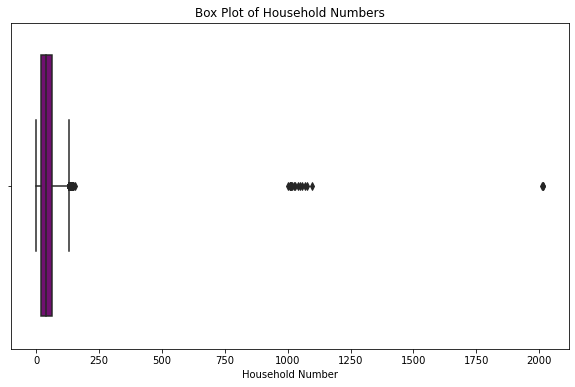

In [82]:

# Distribution plot for Household_number
# plt.figure(figsize=(10, 6))
# sns.histplot(df_cleaned['Household_number'], bins=20, kde=True, color='purple')
# plt.title('Distribution of Household Numbers')
# plt.xlabel('Household Number')
# plt.ylabel('Frequency')
# plt.show()

# Box plot for Household_number
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['Household_number'], color='purple')
plt.title('Box Plot of Household Numbers')
plt.xlabel('Household Number')
plt.show()


2. Health risk indicators

3. Correlation analyses between the different variables to identify potential relationaships

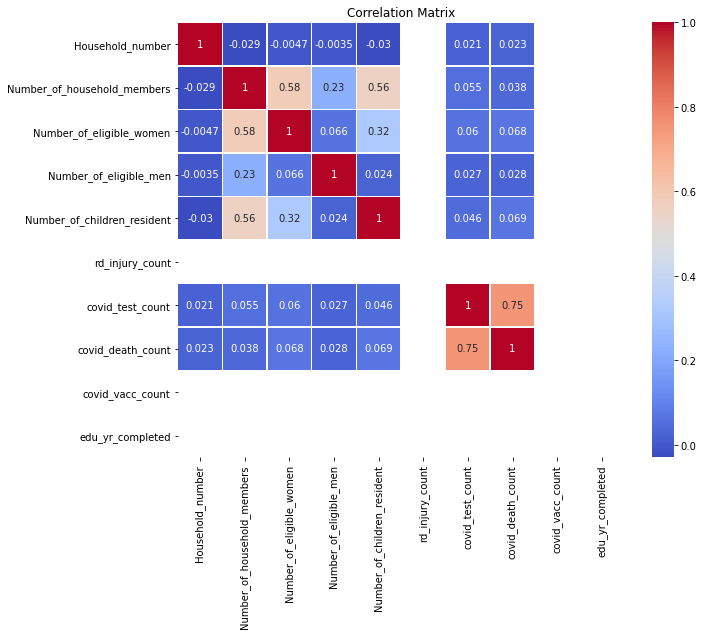

In [89]:
# Select relevant columns for correlation analysis
selected_columns = ['Household_number','Number_of_household_members', 'Number_of_eligible_women','Number_of_eligible_men','Number_of_children_resident','rd_injury_count', 'covid_test_count', 'covid_death_count', 'covid_vacc_count', 'edu_yr_completed']

# Create a subset DataFrame with selected columns
correlation_df = df_cleaned[selected_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

4. Outlier detection

To investigate the potential outliers in numeric variables

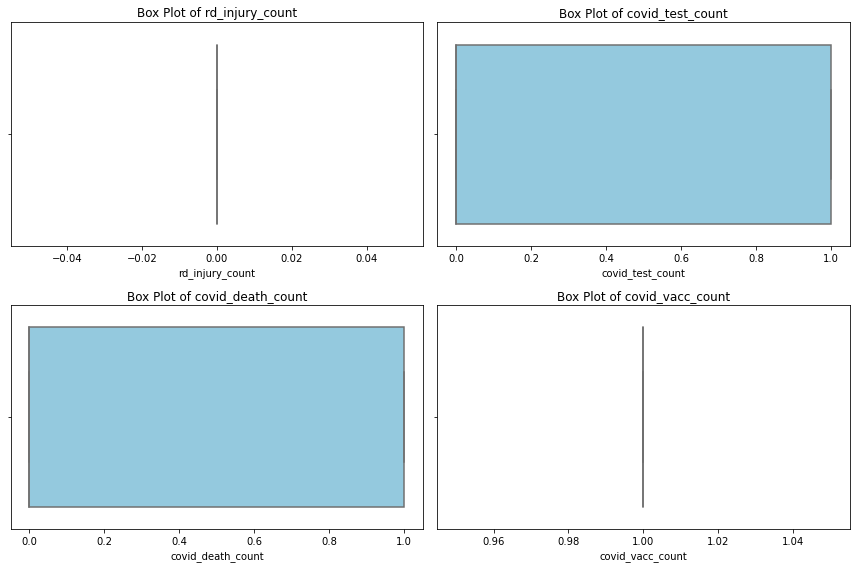

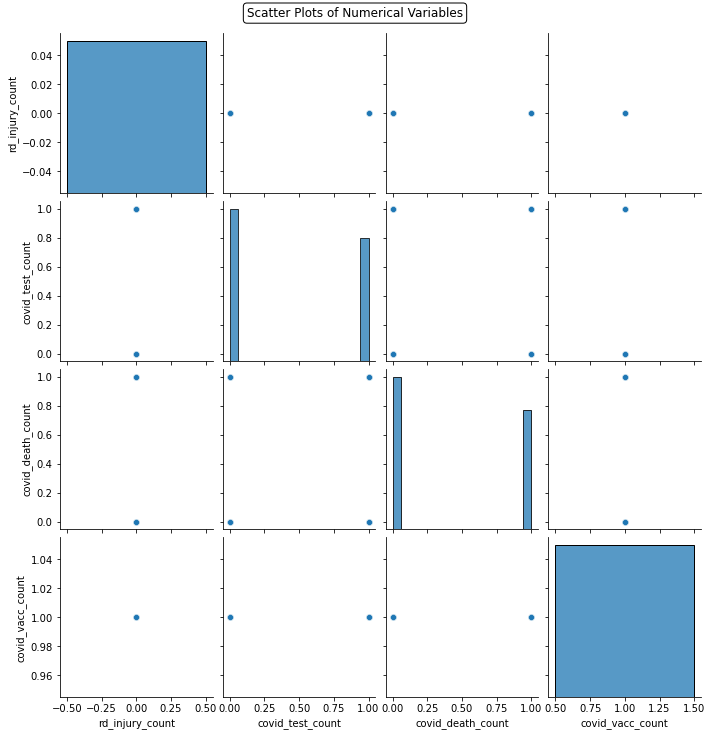

In [86]:
# Select numerical columns for outlier analysis
numerical_columns = ['rd_injury_count', 'covid_test_count', 'covid_death_count', 'covid_vacc_count']
# numerical_columns = df_cleaned.columns
# Create box plots for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_cleaned[column], color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

# Create scatter plots for pairwise comparisons
sns.pairplot(df_cleaned[numerical_columns])
plt.suptitle('Scatter Plots of Numerical Variables', y=1.02, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
plt.show()

In [88]:
df_cleaned['covid_']

0        False
1        False
2        False
3        False
4        False
         ...  
37906    False
37907    False
37908    False
37909    False
37910    False
Name: edu_yr_completed, Length: 37911, dtype: bool

## 2.4) Building Model

* Model Interpretability and Explainability:

Enhance model interpretability to provide actionable insights for decision-makers by employing techniques such as SHAP values or feature importance analysis.


## 2.5) Conclusion

## 2.6) Recommendation

## 2.7) Model Deployment